<a href="https://colab.research.google.com/github/Harikrishna-AL/MathProject/blob/main/Math_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import requests
import csv
url = 'http://api.marketstack.com/v1/tickers?access_key=dd3a2e191efbf0af92a61e70a1d180be'
data = requests.get(url).json()

sym = 'NRG'
y = len(data['data'])
for i in range(y):
  if data['data'][i]['symbol'] == sym:
    base_link = data['data'][i]['stock_exchange']['website']
    link = base_link + '/market-activity/stocks/' + sym
    print(link)
    break
  else:
    link = 'www.nasdaq.com/market-activity/stocks/' + sym
    print(link)
    break
df = pd.read_csv('TSLA.csv')
print(df)


www.nasdaq.com/market-activity/stocks/NRG
           Date        Open        High  ...       Close   Adj Close     Volume
0    2020-01-02   84.900002   86.139999  ...   86.052002   86.052002   47660500
1    2020-01-03   88.099998   90.800003  ...   88.601997   88.601997   88892500
2    2020-01-06   88.094002   90.311996  ...   90.307999   90.307999   50665000
3    2020-01-07   92.279999   94.325996  ...   93.811996   93.811996   89410500
4    2020-01-08   94.739998   99.697998  ...   98.428001   98.428001  155721500
..          ...         ...         ...  ...         ...         ...        ...
248  2020-12-24  642.989990  666.090027  ...  661.770020  661.770020   22865600
249  2020-12-28  674.510010  681.400024  ...  663.690002  663.690002   32278600
250  2020-12-29  661.000000  669.900024  ...  665.989990  665.989990   22910800
251  2020-12-30  672.000000  696.599976  ...  694.780029  694.780029   42846000
252  2020-12-31  699.989990  718.719971  ...  705.669983  705.669983   4964990

In [ ]:
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)
df = df[['Adj Close']]
print(df)

             Adj Close
Date                  
2020-01-02   86.052002
2020-01-03   88.601997
2020-01-06   90.307999
2020-01-07   93.811996
2020-01-08   98.428001
...                ...
2020-12-24  661.770020
2020-12-28  663.690002
2020-12-29  665.989990
2020-12-30  694.780029
2020-12-31  705.669983

[253 rows x 1 columns]


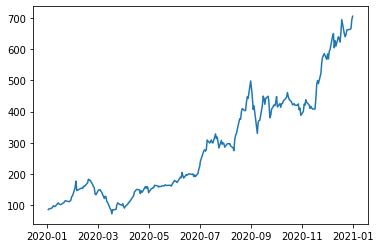

In [ ]:
plt.plot(df[['Adj Close']])

In [ ]:
pip install pandas_ta


     |████████████████████████████████| 115 kB 4.9 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=0c032dbb86e46020093902be8eb97da17e96781087085e49fd4d78bfbeb71de9
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas_ta
df.ta.ema(close='Adj Close', length=10, append=True)
df= df.iloc[10:]
print(df.head())

             Adj Close      EMA_10
Date                              
2020-01-16  102.697998   97.656035
2020-01-17  102.099998   98.464028
2020-01-21  109.440002  100.459660
2020-01-22  113.912003  102.905540
2020-01-23  114.440002  105.002715


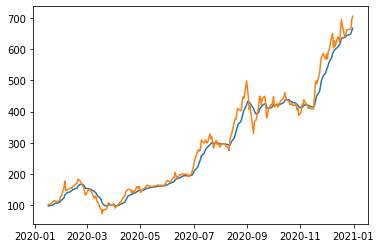

In [ ]:
plt.plot(df[['EMA_10']])
plt.plot(df[['Adj Close']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['Adj Close']], df[['EMA_10']], test_size=.2)

In [ ]:
print(X_test.describe())
print(X_train.describe())

        Adj Close
count   49.000000
mean   324.078692
std    157.384141
min     72.244003
25%    163.774002
50%    299.821991
75%    425.920013
max    649.859985
        Adj Close
count  194.000000
mean   291.361062
std    169.974560
min     85.505997
25%    150.484497
50%    210.486000
75%    420.892510
max    705.669983


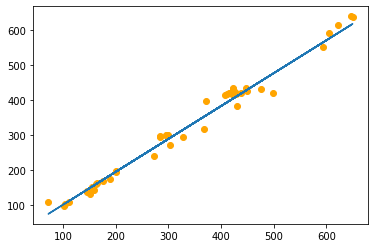

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(y_pred)
plt.plot(X_test,y_pred)
plt.scatter(X_test,y_test,color="orange")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))



Model Coefficients: [[0.94051982]]
Mean Absolute Error: 15.465543262607364
Coefficient of Determination: 0.9835690837021237
